#### Projects Creation

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', ]

#### Tools

In [50]:
def format_assunto(filename):
  assuntos = {
    'metaverse': 'Metaverso',
    'metaverso': 'Metaverso',
    'digital twins': 'Gêmeos Digitais',
    'digital twin': 'Gêmeos Digitais',
    'blockchain': 'Blockchain',
    'gemeos digitais': 'Gêmeos Digitais',
    'Virtual Reality': 'Realidade Virtual',
    'Augmented Reality': 'Realidade Aumentada',
    'Inteligencia Artificial': 'Inteligência Artificial',
    'Artificial Intelligence': 'Inteligência Artificial',
    'Smart Contracts': 'Contratos Inteligentes'
  }
  df = pd.read_csv(filename, sep=";",lineterminator='\r')
  for key, value in assuntos.items():
    df.loc[df['Assunto'] == key, 'Assunto'] = value
  return df

In [51]:
def generate_incremental_array(first_number, last_number, interval):
    array = []
    current_number = first_number
    
    while current_number <= last_number:
        array.append(current_number)
        current_number += interval
    
    return array

#### Todos os Projetos

In [52]:
def plot_projects_creation(csv_file='4.ProjectsFinal.csv'):
    # Read the CSV file into a DataFrame
    df = format_assunto(csv_file)
    
    # Convert 'AnoInicio' column to datetime type
    df['AnoInicio'] = pd.to_datetime(df['AnoInicio'], format='%Y', errors='coerce')
    
    # Group the projects by year and 'Assunto', and count the quantity
    projects_by_year_subject = df.groupby([df['AnoInicio'].dt.year, 'Assunto'])['LattesID'].count().unstack()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot each 'Assunto' as a separate line
    for i, column in enumerate(projects_by_year_subject.columns):
        plt.plot(projects_by_year_subject.index, projects_by_year_subject[column], marker='o', linestyle='--', color=colors[i], label=column)
    
    plt.xlabel('Ano de criação')
    plt.ylabel('Quantidade')
    plt.title('Projetos de pesquisa')
    plt.legend()
    plt.xticks(generate_incremental_array(1988, 2023, 5), rotation=0)
    plt.savefig('todos_projetos.pdf', dpi=600, bbox_inches='tight')
    plt.show()

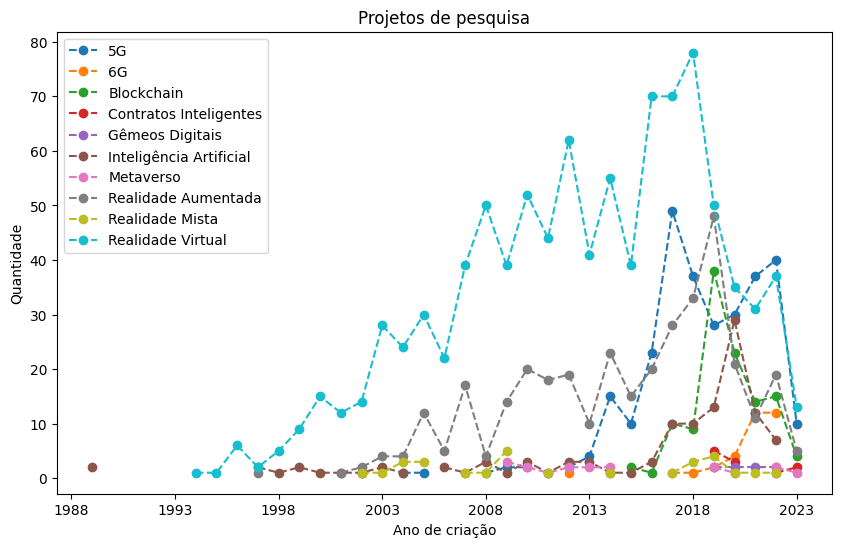

In [53]:
plot_projects_creation()

#### Projetos em andamento

In [54]:
def plot_projects_andamento(csv_file='4.ProjectsFinal.csv'):
    # Read the CSV file into a DataFrame
    df = format_assunto(csv_file)
    df = df[df['AnoFim'] == 'Atual']
    
    # Convert 'AnoInicio' column to datetime type
    df['AnoInicio'] = pd.to_datetime(df['AnoInicio'], format='%Y', errors='coerce')
    
    # Group the projects by year and 'Assunto', and count the quantity
    projects_by_year_subject = df.groupby([df['AnoInicio'].dt.year, 'Assunto'])['LattesID'].count().unstack()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot each 'Assunto' as a separate line
    for i, column in enumerate(projects_by_year_subject.columns):
        plt.plot(projects_by_year_subject.index, projects_by_year_subject[column], marker='o', linestyle='--', color=colors[i], label=column)
    
    plt.xlabel('Ano de criação')
    plt.ylabel('Quantidade')
    plt.title('Projetos de pesquisa em andamento')
    plt.legend()
    plt.xticks(generate_incremental_array(1988, 2023, 5), rotation=0)
    plt.savefig('projetos_andamento.pdf', dpi=600, bbox_inches='tight')
    plt.show()

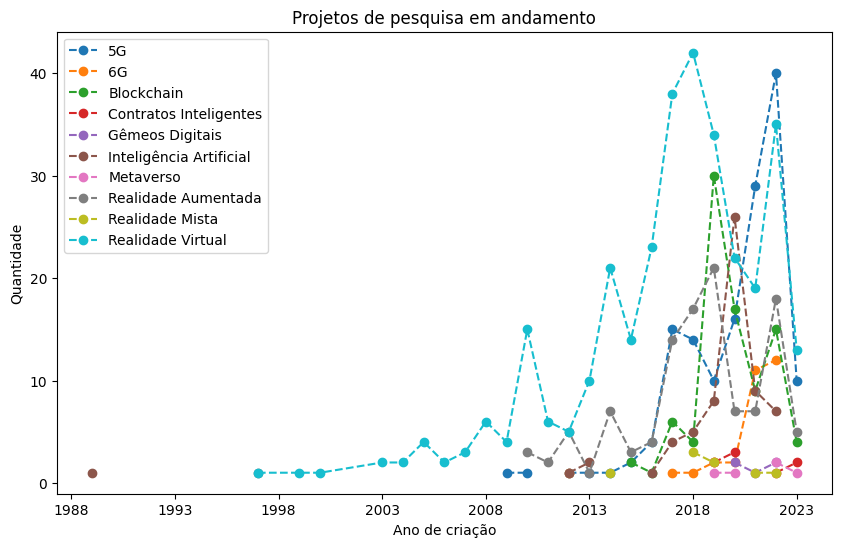

In [55]:
plot_projects_andamento()

#### Projetos finalizados

In [56]:
def plot_projects_finalizados(csv_file='4.ProjectsFinal.csv'):
    # Read the CSV file into a DataFrame
    df = format_assunto(csv_file)
    df = df[df['AnoFim'] != 'Atual']
    
    # Convert 'AnoInicio' column to datetime type
    df['AnoInicio'] = pd.to_datetime(df['AnoInicio'], format='%Y', errors='coerce')
    
    # Group the projects by year and 'Assunto', and count the quantity
    projects_by_year_subject = df.groupby([df['AnoInicio'].dt.year, 'Assunto'])['LattesID'].count().unstack()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot each 'Assunto' as a separate line
    for i, column in enumerate(projects_by_year_subject.columns):
        plt.plot(projects_by_year_subject.index, projects_by_year_subject[column], marker='o', linestyle='--', color=colors[i], label=column)
    
    plt.xlabel('Ano de criação')
    plt.ylabel('Quantidade')
    plt.title('Projetos de pesquisa finalizados')
    plt.legend()
    plt.xticks(generate_incremental_array(1988, 2023, 5), rotation=0)
    plt.savefig('projetos_finalizados.pdf', dpi=600, bbox_inches='tight')
    plt.show()

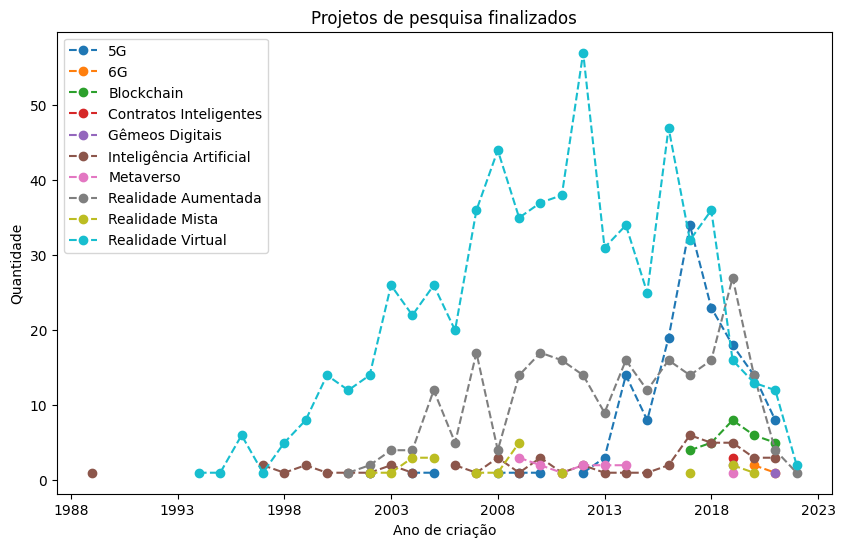

In [57]:
plot_projects_finalizados()

####Mapa

In [58]:
!pip install geobr
!pip install geopandas 
!pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import geobr
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
import geopandas as gpd

def plot_map(csv_path='5.ProjectsGroup.csv'):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_path, delimiter=';')

    # Group the DataFrame by 'estado' and count the rows per state
    state_counts = df['Estado'].value_counts().reset_index()
    state_counts.columns = ['Estado', 'count']
    brazil_states = [
        'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal',
        'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul',
        'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
        'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina',
        'São Paulo', 'Sergipe', 'Tocantins'
    ]
    for state in brazil_states:
      if state not in state_counts.Estado.values:
        state_counts.loc[len(state_counts.index)] = [state, 0] 
    # Read the GeoJSON data of Brazil states using geopandas
    with urlopen("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson") as response:
      gdf = gpd.read_file(response) # Javascrip object notation 

    # Merge the state counts DataFrame with the geopandas DataFrame based on 'estado' column
    merged = gdf.merge(state_counts, left_on='name', right_on='Estado', how='left')

    fig, ax = plt.subplots(figsize=(16, 9))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    merged.plot(column="count",
                # cmap="Blue_l",
                # cmap="viridis",
                cmap="plasma",
                # cmap="inferno",
                # cmap="magma",
                # cmap="cividis",
                legend=True,
                legend_kwds={
                    "label": "Quantidade",
                    "orientation": "horizontal",
                    "shrink": 0.6,
                },
                ax=ax, )
    plt.title("Projetos de pesquisa")
    plt.savefig('projetos_mapa.pdf', dpi=600, bbox_inches='tight')


/usr/local/lib/python3.10/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/usr/local/lib/python3.10/dist-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords'

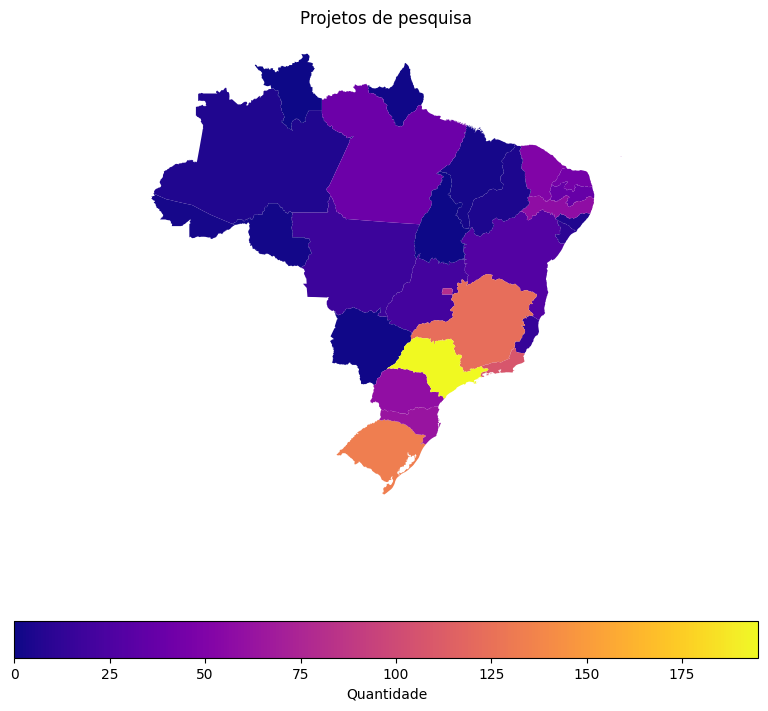

In [60]:
plot_map()